# Case Study: Synthea

Data for the synthea dataset is derived the work done at the cohort-rep-hackathon [https://github.com/ga4gh/cohort-rep-hackathon]. The data is a realistic representation of EHR data in a clinical setting, no ResearchStudy exists.  Each Patient is connected to a dense set of clinical data: Observation, Conditions, Procedures, etc.  Observations also contain questionnaire answers.

In [1]:
import sys
# add git repo to our path (TODO - eliminate this step if we create a fhir-workshop package)
sys.path.append('./fhir-workshop')


In [2]:
from fhir_workshop.graph import load_graph, draw_graph, summarize_graph, find_by_resource_type, find_nearest
import fhir_workshop.manifests as manifests
import os
import pandas as pd 
from flatten_json import flatten



## Load the data


> In lieu of accessing a 'live' fhir service, we've pre-fetched some data


> The `load_graph` function loads the file paths into fhir resources and creates linkages between them, effectively simulating links the fhir server would normally provide


In [3]:
graph = load_graph('synthea', manifests.synthea_file_paths(), expected_resource_count=104000)


### Draw a summary graph

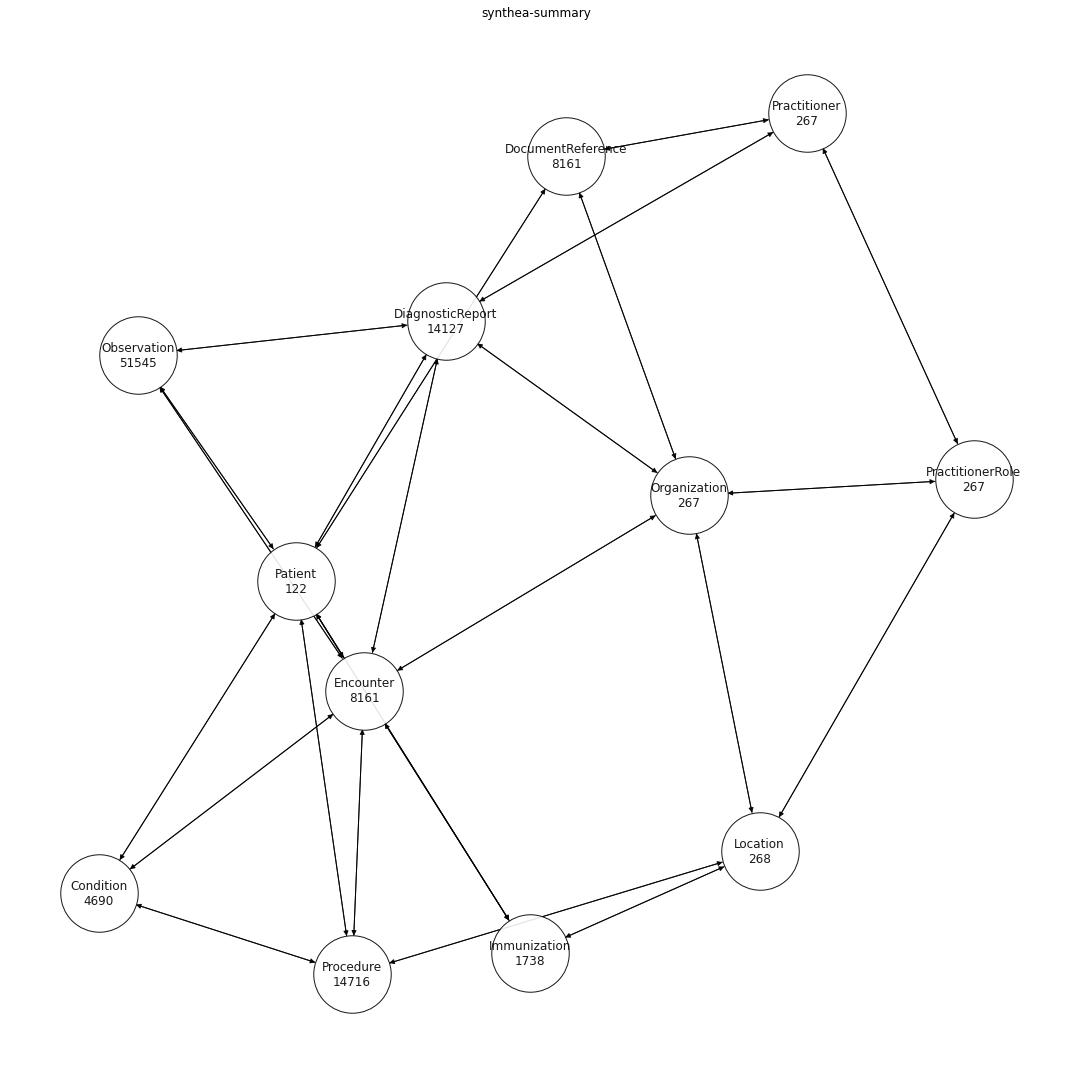

In [4]:
summary_graph = summarize_graph(graph)
path = os.path.join('/tmp/', 'synthea-summary.png')
draw_graph(summary_graph, path=path, layout='spring_layout')

### Retrieve all Patients

In [5]:
# "retrieve" the patients
patients = find_by_resource_type(graph, 'Patient')
# count the tuples that returned
assert len(patients) == 122, "should have 122 patients"
# get the FHIR resources
patients = [dict_['resource'] for id_, dict_ in patients]


### Show details

In [6]:
pd.DataFrame([flatten(patient.as_json()) for patient in patients] )

,id,meta_profile_0,text_status,text_div,extension_0_extension_0_url,extension_0_extension_0_valueCoding_system,extension_0_extension_0_valueCoding_code,extension_0_extension_0_valueCoding_display,extension_0_extension_1_url,extension_0_extension_1_valueString,...,maritalStatus_coding_0_code,maritalStatus_coding_0_display,maritalStatus_text,multipleBirthBoolean,communication_0_language_coding_0_system,communication_0_language_coding_0_code,communication_0_language_coding_0_display,communication_0_language_text,resourceType,deceasedDateTime
0,9e74daad-30a9-e313-cd29-917f4c258ff8,http://hl7.org/fhir/us/core/StructureDefinitio...,generated,"<div xmlns=""http://www.w3.org/1999/xhtml"">Gene...",ombCategory,urn:oid:2.16.840.1.113883.6.238,2106-3,White,text,White,...,M,M,M,False,urn:ietf:bcp:47,en-US,English,English,Patient,NaN
1,09b0050e-6705-9aca-6738-2b753d0dc7f4,http://hl7.org/fhir/us/core/StructureDefinitio...,generated,"<div xmlns=""http://www.w3.org/1999/xhtml"">Gene...",ombCategory,urn:oid:2.16.840.1.113883.6.238,2106-3,White,text,White,...,M,M,M,False,urn:ietf:bcp:47,en-US,English,English,Patient,NaN
2,f0d95571-3dbd-6f35-f92d-4b505ffe876d,http://hl7.org/fhir/us/core/StructureDefinitio...,generated,"<div xmlns=""http://www.w3.org/1999/xhtml"">Gene...",ombCategory,urn:oid:2.16.840.1.113883.6.238,2106-3,White,text,White,...,M,M,M,False,urn:ietf:bcp:47,en-US,English,English,Patient,NaN
3,652831dd-ef5c-8b1e-63ab-d11a62cfab2b,http://hl7.org/fhir/us/core/StructureDefinitio...,generated,"<div xmlns=""http://www.w3.org/1999/xhtml"">Gene...",ombCategory,urn:oid:2.16.840.1.113883.6.238,2106-3,White,text,White,...,M,M,M,False,urn:ietf:bcp:47,en-US,English,English,Patient,NaN
4,f3c1726a-e4c7-6a3e-70dc-872794faa3d1,http://hl7.org/fhir/us/core/StructureDefinitio...,generated,"<div xmlns=""http://www.w3.org/1999/xhtml"">Gene...",ombCategory,urn:oid:2.16.840.1.113883.6.238,2106-3,White,text,White,...,M,M,M,False,urn:ietf:bcp:47,en-US,English,English,Patient,1993-05-12T05:29:16-07:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,9b9d05ef-33e8-83c6-a88d-9047071c39b9,http://hl7.org/fhir/us/core/StructureDefinitio...,generated,"<div xmlns=""http://www.w3.org/1999/xhtml"">Gene...",ombCategory,urn:oid:2.16.840.1.113883.6.238,2028-9,Asian,text,Asian,...,M,M,M,False,urn:ietf:bcp:47,zh,Chinese,Chinese,Patient,2011-04-04T00:09:35-07:00
118,44c55f11-2011-9eac-4f16-5fca082837fd,http://hl7.org/fhir/us/core/StructureDefinitio...,generated,"<div xmlns=""http://www.w3.org/1999/xhtml"">Gene...",ombCategory,urn:oid:2.16.840.1.113883.6.238,2106-3,White,text,White,...,M,M,M,False,urn:ietf:bcp:47,en-US,English,English,Patient,NaN
119,d24fbebe-e6ef-4056-c32d-1bebff8fc559,http://hl7.org/fhir/us/core/StructureDefinitio...,generated,"<div xmlns=""http://www.w3.org/1999/xhtml"">Gene...",ombCategory,urn:oid:2.16.840.1.113883.6.238,2106-3,White,text,White,...,M,M,M,False,urn:ietf:bcp:47,en-US,English,English,Patient,NaN
120,f512b636-7fbf-a7de-068b-2dff117aa590,http://hl7.org/fhir/us/core/StructureDefinitio...,generated,"<div xmlns=""http://www.w3.org/1999/xhtml"">Gene...",ombCategory,urn:oid:2.16.840.1.113883.6.238,2028-9,Asian,text,Asian,...,M,M,M,False,urn:ietf:bcp:47,zh,Chinese,Chinese,Patient,NaN


### Show simplified details

> 1/3 the number of columns

In [7]:
pd.DataFrame([flatten(patient.as_simplified_json()[0]) for patient in patients] ).fillna('')

,id,meta_profile,text_status,text_div,extension_us-core-race,extension_us-core-ethnicity,extension_patient-mothersMaidenName,extension_us-core-birthsex,extension_patient-birthPlace,extension_disability-adjusted-life-years,...,maritalStatus_coding_v3-MaritalStatus,maritalStatus_text,multipleBirthBoolean,communication_language_coding_urn:ietf:bcp:47,communication_language_text,name_use,name_family,name_given,name_prefix,deceasedDateTime
0,9e74daad-30a9-e313-cd29-917f4c258ff8,http://hl7.org/fhir/us/core/StructureDefinitio...,generated,"<div xmlns=""http://www.w3.org/1999/xhtml"">Gene...",2106-3|White,2186-5|Not Hispanic or Latino,Sena221 White193,F,Mount Washington,9.972492,...,M,M,False,en-US,English,,,,,
1,09b0050e-6705-9aca-6738-2b753d0dc7f4,http://hl7.org/fhir/us/core/StructureDefinitio...,generated,"<div xmlns=""http://www.w3.org/1999/xhtml"">Gene...",2106-3|White,2186-5|Not Hispanic or Latino,Evelina828 Conroy74,M,Somerville,0.315475,...,M,M,False,en-US,English,official,Padberg411,Ty725,Mr.,
2,f0d95571-3dbd-6f35-f92d-4b505ffe876d,http://hl7.org/fhir/us/core/StructureDefinitio...,generated,"<div xmlns=""http://www.w3.org/1999/xhtml"">Gene...",2106-3|White,2186-5|Not Hispanic or Latino,Chanel977 Bartell116,M,Hopkinton,1.144286,...,M,M,False,en-US,English,official,Hoeger474,Juan88,Mr.,
3,652831dd-ef5c-8b1e-63ab-d11a62cfab2b,http://hl7.org/fhir/us/core/StructureDefinitio...,generated,"<div xmlns=""http://www.w3.org/1999/xhtml"">Gene...",2106-3|White,2186-5|Not Hispanic or Latino,Lannie207 Barton704,F,Andover,2.183794,...,M,M,False,en-US,English,,,,,
4,f3c1726a-e4c7-6a3e-70dc-872794faa3d1,http://hl7.org/fhir/us/core/StructureDefinitio...,generated,"<div xmlns=""http://www.w3.org/1999/xhtml"">Gene...",2106-3|White,2186-5|Not Hispanic or Latino,Jayna69 Reynolds644,M,Somerville,1.218883,...,M,M,False,en-US,English,official,Weimann465,Rick943,Mr.,1993-05-12T05:29:16-07:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,9b9d05ef-33e8-83c6-a88d-9047071c39b9,http://hl7.org/fhir/us/core/StructureDefinitio...,generated,"<div xmlns=""http://www.w3.org/1999/xhtml"">Gene...",2028-9|Asian,2186-5|Not Hispanic or Latino,Deanna833 Stroman228,F,Chongqing,0.620983,...,M,M,False,zh,Chinese,,,,,2011-04-04T00:09:35-07:00
118,44c55f11-2011-9eac-4f16-5fca082837fd,http://hl7.org/fhir/us/core/StructureDefinitio...,generated,"<div xmlns=""http://www.w3.org/1999/xhtml"">Gene...",2106-3|White,2186-5|Not Hispanic or Latino,Rosalie939 Abernathy524,M,Framingham,1.684387,...,M,M,False,en-US,English,official,Russel238,Ismael683,Mr.,
119,d24fbebe-e6ef-4056-c32d-1bebff8fc559,http://hl7.org/fhir/us/core/StructureDefinitio...,generated,"<div xmlns=""http://www.w3.org/1999/xhtml"">Gene...",2106-3|White,2186-5|Not Hispanic or Latino,Ilda728 Mertz280,F,Hopedale,2.706373,...,M,M,False,en-US,English,,,,,
120,f512b636-7fbf-a7de-068b-2dff117aa590,http://hl7.org/fhir/us/core/StructureDefinitio...,generated,"<div xmlns=""http://www.w3.org/1999/xhtml"">Gene...",2028-9|Asian,2186-5|Not Hispanic or Latino,Diane211 Reichert620,F,Beijing,21.580734,...,M,M,False,zh,Chinese,,,,,


## Navigate using FHIR references

In [8]:
observations = [dict_['resource'] for id_, dict_ in find_by_resource_type(graph, 'Observation')]
document_references = [dict_['resource'] for id_, dict_ in find_by_resource_type(graph, 'DocumentReference')]
patients = set([graph.nodes.get(document_reference.subject.reference)['resource'] for document_reference in document_references])
f"document_references: {len(document_references)} patients: {len(patients)}"

'document_references: 8161 patients: 122'

### Create Document Data Frame

In [9]:
import base64

pd.DataFrame([
    {
        **{
            'author': document_references[0].author[0].display,
            'subject': d.subject.reference,
            'document': base64.b64decode(d.content[0].attachment.data),
        }
        
    }
    for d in document_references ] 
)

,author,subject,document
0,Dr. Jae222 Schultz619,Patient/f0d95571-3dbd-6f35-f92d-4b505ffe876d,b'\n1977-12-25\n\n# Chief Complaint\nNo compla...
1,Dr. Jae222 Schultz619,Patient/09b0050e-6705-9aca-6738-2b753d0dc7f4,b'\n1992-03-22\n\n# Chief Complaint\nNo compla...
2,Dr. Jae222 Schultz619,Patient/031a0694-ebc8-293d-fd6a-0674eb08eca7,b'\n2014-10-23\n\n# Chief Complaint\nNo compla...
3,Dr. Jae222 Schultz619,Patient/652831dd-ef5c-8b1e-63ab-d11a62cfab2b,b'\n1988-03-31\n\n# Chief Complaint\nNo compla...
4,Dr. Jae222 Schultz619,Patient/9e74daad-30a9-e313-cd29-917f4c258ff8,b'\n2002-02-21\n\n# Chief Complaint\nNo compla...
...,...,...,...
8156,Dr. Jae222 Schultz619,Patient/227b79c3-c0fc-1884-d9d2-b6a323f2b960,b'\n2021-08-04\n\n# Chief Complaint\n- Joint S...
8157,Dr. Jae222 Schultz619,Patient/227b79c3-c0fc-1884-d9d2-b6a323f2b960,b'\n2022-01-18\n\n# Chief Complaint\n- Joint S...
8158,Dr. Jae222 Schultz619,Patient/227b79c3-c0fc-1884-d9d2-b6a323f2b960,b'\n2022-01-26\n\n# Chief Complaint\n- Joint S...
8159,Dr. Jae222 Schultz619,Patient/227b79c3-c0fc-1884-d9d2-b6a323f2b960,b'\n2022-02-02\n\n# Chief Complaint\n- Joint S...


### Create Observation Data Frame

In [10]:
records = []

for o in observations:
    attributes = {
            'subject': o.subject.reference if o.subject else None,
            'specimen': o.specimen.reference if o.specimen else None,
            'code': o.code.text if o.code.text else o.code.coding[0].display,
            'valueQuantity': o.valueQuantity.value if o.valueQuantity else None,
            'valueQuantity_unit': o.valueQuantity.unit if o.valueQuantity else None,
            'valueCodeableConcept': o.valueCodeableConcept.coding[0].display if o.valueCodeableConcept else None
        }
    components = {}
    if o.component:
        components = {
            c.code.coding[0].display if c.code.coding[0].display else c.code.coding[0].code:
            c.valueCodeableConcept.coding[0].display if c.valueCodeableConcept.coding else c.valueCodeableConcept.text
            for c in o.component if c.valueCodeableConcept
        }        
    records.append({**attributes, **components})

pd.DataFrame(records).fillna('')

,subject,specimen,code,valueQuantity,valueQuantity_unit,valueCodeableConcept,"In the past year, have you been afraid of your partner or ex-partner?",Do you feel physically and emotionally safe where you currently live?,Are you a refugee?,"In the past year, have you spent more than 2 nights in a row in a jail, prison, detention center, or juvenile correctional facility?",...,What is your main insurance?,What is your current work situation?,What is the highest level of school that you have finished?,Are you worried about losing your housing?,What is your housing situation today?,What language are you most comfortable speaking?,Have you been discharged from the armed forces of the United States?,"At any point in the past 2 years, has season or migrant farm work been your or your family's main source of income?",Which race(s) are you?,Are you Hispanic or Latino?
0,Patient/031a0694-ebc8-293d-fd6a-0674eb08eca7,,Body Height,51.4,cm,,,,,,...,,,,,,,,,,
1,Patient/031a0694-ebc8-293d-fd6a-0674eb08eca7,,Pain severity - 0-10 verbal numeric rating [Sc...,4.0,{score},,,,,,...,,,,,,,,,,
2,Patient/031a0694-ebc8-293d-fd6a-0674eb08eca7,,Body Weight,3.7,kg,,,,,,...,,,,,,,,,,
3,Patient/031a0694-ebc8-293d-fd6a-0674eb08eca7,,Weight-for-length Per age and sex,47.499,%,,,,,,...,,,,,,,,,,
4,Patient/031a0694-ebc8-293d-fd6a-0674eb08eca7,,Head Occipital-frontal circumference,34.51,cm,,,,,,...,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51540,Patient/227b79c3-c0fc-1884-d9d2-b6a323f2b960,,Tobacco smoking status NHIS,,,Former smoker,,,,,...,,,,,,,,,,
51541,Patient/227b79c3-c0fc-1884-d9d2-b6a323f2b960,,Hemoglobin A1c/Hemoglobin.total in Blood,6.05,%,,,,,,...,,,,,,,,,,
51542,Patient/227b79c3-c0fc-1884-d9d2-b6a323f2b960,,Protocol for Responding to and Assessing Patie...,,,,No,Yes,No,No,...,Medicare,Full-time work,High school diploma or GED,No,I have housing,English,No,No,White,No
51543,Patient/227b79c3-c0fc-1884-d9d2-b6a323f2b960,,Fall risk total [Morse Fall Scale],73.0,{#},,,,,,...,,,,,,,,,,
